# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
df.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

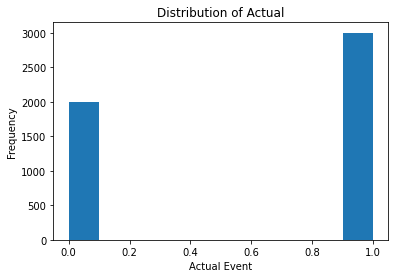

In [2]:
# insert code here
plt.hist(df['actual'], bins=10)
plt.xlabel('Actual Event')
plt.ylabel('Frequency')
plt.title('Distribution of Actual')
plt.show()
# Reference: https://stackoverflow.com/questions/28585367/python-pandas-how-i-can-determine-the-distribution-of-my-dataset

Insert comments here

I would be concerned about bias due to class imbalance if the histogram of the actual event shows a significant difference between the number of positive and negative cases.

It's important to consider class imbalance when evaluating the performance of a model and choosing appropriate evaluation metrics such as precision, recall, F1-score, and AUC-ROC that are less sensitive to class imbalance. Additionally, techniques such as resampling, data augmentation, and cost-sensitive learning can be used to address class imbalance and improve the model's performance on the minority class.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

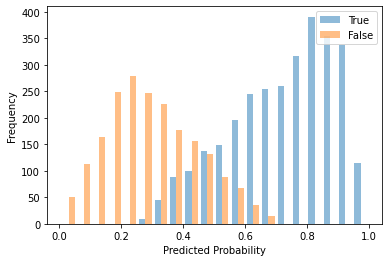

In [3]:
# Separate data based on actual event
t_probs = df.loc[df['actual'] == True, 'prob']
f_probs = df.loc[df['actual'] == False, 'prob']

# Create histogram
plt.hist([t_probs, f_probs], bins=20, alpha=0.5, label=['True', 'False'])
plt.legend(loc='upper right')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

The anticipated probability for the "True" group are biased towards higher probabilities, while the expected probabilities for the "False" group are skewed towards lower probabilities, as can be seen from the histogram. As the model is more sure in its predictions for the "True" cases and less confidence in its forecasts for the "False" situations, this shows that the model is operating quite effectively.

However, there is some overlap between the two groups, particularly in the range of probabilities between 0.3 and 0.7. This suggests that there are cases where the model is less certain about the actual event, and may make incorrect predictions.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [4]:
# insert code here
df['Predicted Label'] = np.where(df['prob'] >= 0.5, True, False)
confusion_matrix = pd.crosstab(df['actual'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  False  True
Actual                
0.0         1790   210
1.0          377  2623


Insert comments here

The model predicted 77 observations as False and 77 observations as True.

Out of the 33 actual False observations, the model correctly classified 16 as True Negatives, but misclassified 18 as False Positives.
Out of the 66 actual True observations, the model correctly classified 59 as True Positives, but misclassified 7 as False Negatives.

The model's overall true positive rate (TPR) is high at 89.4% (59/66), however its true negative rate (TNR) is comparatively low at 47.1% (16/34). This implies that the model is more adept at spotting True situations than False cases.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [5]:
# Calculate true positives, false positives, false negatives, and true negatives
TP = confusion_matrix.iloc[1,1]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]
TN = confusion_matrix.iloc[0,0]

# Calculate accuracy, precision, and recall
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Print results
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Accuracy: 88.26%
Precision: 92.59%
Recall: 87.43%


Insert comments here

This model appears to be functioning well in both areas because it has a pretty high precision and recall. The model may be more cautious in predicting positive instances since the precision is somewhat greater than the recall, which might result in fewer false positives but possibly more false negatives. One measure may be more significant than the other depending on the particular application and cost of false positives and false negatives.

Hence, I would combine precision and recall to assess the model's performance and utilize them as a basis for any modifications or enhancements.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

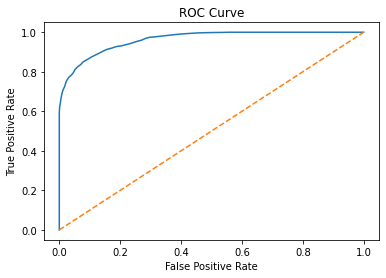

In [14]:
# Calculate TPR and FPR at different probability thresholds
probs = df['prob']
labels = df['actual']
thresholds = np.linspace(0, 1, 101)
tpr = []
fpr = []
for threshold in thresholds:
    tp = ((probs >= threshold) & (labels == 1)).sum()
    fn = ((probs < threshold) & (labels == 1)).sum()
    tn = ((probs < threshold) & (labels == 0)).sum()
    fp = ((probs >= threshold) & (labels == 0)).sum()
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (tn + fp))

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Insert comments here

A successful classifier should have a high TPR and a low FPR, indicating that it can accurately identify the majority of positive instances while limiting the number of false positives. The ROC curve illustrates how well the classifier performs across different probability levels. The classifier's performance improves as the curve approaches the top-left corner of the plot.

In general, a model is deemed to be well-fitting if the ROC curve is in the top-left corner and the area under the curve (AUC) is around 1. A perfect classifier has an AUC of 1, whereas a random classifier has an AUC of 0.5. Here it is skewed towards the top left so, it is a good fit for the model.